In [17]:
import requests
from datetime import datetime
from urllib.parse import urlencode
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [18]:
BASE_URL = "https://data.mitwelten.org/api/v3/"
LEVEL = "SPECIES"


In [19]:
# request a list with all species
taxon_list = requests.get(f"{BASE_URL}taxonomy/level/{LEVEL}").json()
taxon_list

[{'datum_id': 2480589,
  'label_sci': 'Accipiter gentilis',
  'label_de': 'Habicht',
  'label_en': 'Goshawk',
  'image_url': 'https://upload.wikimedia.org/wikipedia/commons/8/81/Northern_Goshawk_ad_M2.jpg',
  'rank': 'SPECIES'},
 {'datum_id': 2480637,
  'label_sci': 'Accipiter nisus',
  'label_de': 'Sperber',
  'label_en': 'Eurasian Sparrowhawk',
  'image_url': 'https://upload.wikimedia.org/wikipedia/commons/2/24/Sparrowhawk_at_the_bottom_of_the_garden_1_%285339463544%29.jpg',
  'rank': 'SPECIES'},
 {'datum_id': 2493128,
  'label_sci': 'Acrocephalus arundinaceus',
  'label_de': 'Drosselrohrsänger',
  'label_en': 'Great Reed Warbler',
  'image_url': 'https://upload.wikimedia.org/wikipedia/commons/0/03/Drosselrohrs%C3%A4nger_Great_reed_warbler.jpg',
  'rank': 'SPECIES'},
 {'datum_id': 2493136,
  'label_sci': 'Acrocephalus palustris',
  'label_de': 'Sumpfrohrsänger',
  'label_en': 'Marsh Warbler',
  'image_url': 'https://upload.wikimedia.org/wikipedia/commons/a/a0/Marsh_Warbler_%28Acrocep

In [20]:
# find the taxon_key by name
SPECIES_NAME = "Apus apus"
taxonomy_tree = requests.get(f"{BASE_URL}taxonomy/sci/{SPECIES_NAME}").json()
species_id = taxonomy_tree[0].get("datum_id")
species_id

5228676

In [22]:
CONFIDENCE = 0.8
BUCKET_WIDTH = "1d"
TIME_FROM = datetime(2021, 5, 1).isoformat()
TIME_TO = datetime(2021, 9, 1).isoformat()
params = {
    "conf": CONFIDENCE,
    "bucket_width": BUCKET_WIDTH,
    "from": TIME_FROM,
    "to": TIME_TO,
}
url = f"{BASE_URL}birds/{species_id}/date?{urlencode(params)}"
response = requests.get(url).json()
response

{'bucket': ['2021-05-10T00:00:00+00:00',
  '2021-05-11T00:00:00+00:00',
  '2021-05-12T00:00:00+00:00',
  '2021-05-13T00:00:00+00:00',
  '2021-05-14T00:00:00+00:00',
  '2021-05-15T00:00:00+00:00',
  '2021-05-16T00:00:00+00:00',
  '2021-05-17T00:00:00+00:00',
  '2021-05-18T00:00:00+00:00',
  '2021-05-19T00:00:00+00:00',
  '2021-05-20T00:00:00+00:00',
  '2021-05-21T00:00:00+00:00',
  '2021-05-22T00:00:00+00:00',
  '2021-05-23T00:00:00+00:00',
  '2021-05-24T00:00:00+00:00',
  '2021-05-25T00:00:00+00:00',
  '2021-05-28T00:00:00+00:00',
  '2021-05-29T00:00:00+00:00',
  '2021-05-30T00:00:00+00:00',
  '2021-05-31T00:00:00+00:00',
  '2021-06-01T00:00:00+00:00',
  '2021-06-02T00:00:00+00:00',
  '2021-06-03T00:00:00+00:00',
  '2021-06-04T00:00:00+00:00',
  '2021-06-05T00:00:00+00:00',
  '2021-06-06T00:00:00+00:00',
  '2021-06-07T00:00:00+00:00',
  '2021-06-08T00:00:00+00:00',
  '2021-06-09T00:00:00+00:00',
  '2021-06-10T00:00:00+00:00',
  '2021-06-11T00:00:00+00:00',
  '2021-06-12T00:00:00+00:00'

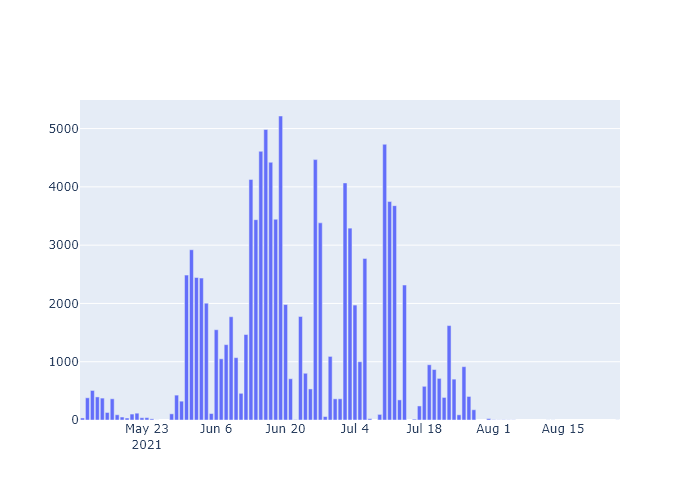

In [23]:
fig = go.Figure(go.Bar(x=response.get("bucket"),y=response.get("detections")))
fig.show("png")